# Numerična matematika - domača naloga 3
## Matematično nihalo
Gregor Kovač

In [48]:
import numpy as np
from nihalo import *
import matplotlib.pyplot as plt

# Latex font
plt.rc('text', usetex=True)

In [62]:
theta, dtheta = nihalo(l = 1, t = 2, theta0 = np.pi / 2, dtheta0 = 0.1, n = 50)

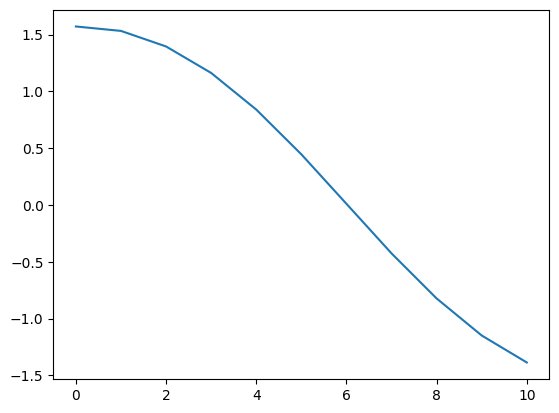

In [34]:
plt.plot(theta)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


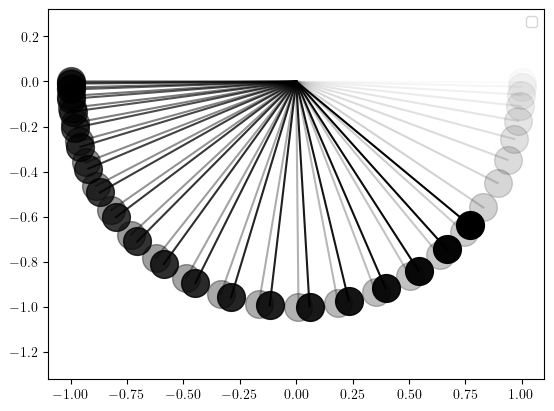

In [63]:
x = np.cos(theta)
y = np.sin(theta)
colors = np.linspace(0, 1, len(x))

for i in range(len(x)):
    plt.plot([0, y[i]], [0, -x[i]], color=(0, 0, 0, colors[i]))
    plt.plot(y[i], -x[i], 'o', color=(0, 0, 0, colors[i]), markersize=20)

plt.axis('equal')


plt.legend()